In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
#hyper-parameters
lr = 0.01
momentum = 0.5
log_interval = 10  #跑10batach进行一次日志记录
epochs = 10
batch_size = 64
test_batch_size = 1000

# 定义网络
- super类的作用是继承的时候，调用含super的各个的基类__init__函数，如果不使用super，就不会调用这些类的__init__函数。

**nn.Sequential**
- 一个有序的容器，神经网络模块将按照在传入构造器的顺序依次被添加到计算图中执行，同时以神经网络模块为元素的有序字典也可以作为传入参数。
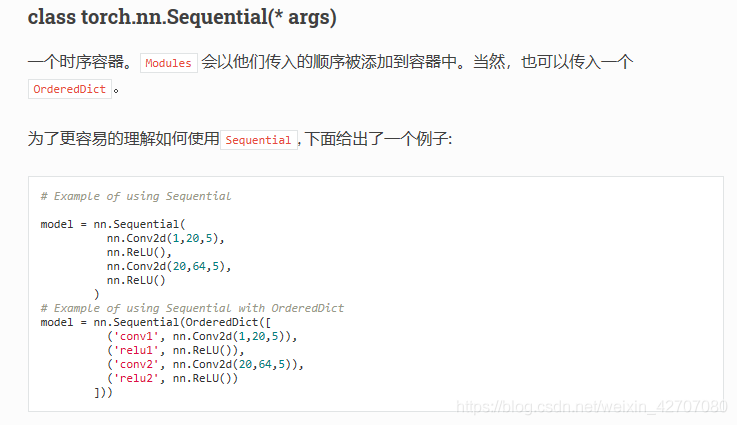

**nn.Conv2d()**
- torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)

    - in_channels(int) – 输入信号的通道
    - out_channels(int) – 卷积产生的通道
    - kerner_size(int or tuple) - 卷积核的尺寸
    - stride(int or tuple, optional) - 卷积步长
    - padding(int or tuple, optional) - 输入的每一条边补充0的层数
    - dilation(int or tuple, optional) – 卷积核元素之间的间距
    - groups(int, optional) – 从输入通道到输出通道的阻塞连接数
    - bias(bool, optional) - 如果bias=True，添加偏置
    
- dilation: 用于控制内核点之间的距离
- groups: 控制输入和输出之间的连接： group=1，输出是所有的输入的卷积；group=2，此时相当于有并排的两个卷积层，每个卷积层计算输入通道的一半，并且产生的输出是输出通道的一半，随后将这两个输出连接起来。

- 参数kernel_size，stride,padding，dilation也可以是一个int的数据，此时卷积height和width值相同;也可以是一个tuple数组，tuple的第一维度表示height的数值，tuple的第二维度表示width的数值

**nn.ReLU()**

- 激活函数（Activation Function），就是在人工神经网络的神经元上运行的函数，负责将神经元的输入映射到输出端。引入激活函数是为了增加神经网络模型的非线性。没有激活函数的每层都相当于矩阵相乘。就算你叠加了若干层之后，无非还是个矩阵相乘罢了。

- 如果不用激活函数，每一层输出都是上层输入的线性函数，无论神经网络有多少层，输出都是输入的线性组合，这种情况就是最原始的感知机。如果使用的话，激活函数给神经元引入了非线性因素，使得神经网络可以任意逼近任何非线性函数，这样神经网络就可以应用到众多的非线性模型中。

**ReLU**函数是分段线性函数，所有的负值和0为0，所有的正值不变，这种操作被称为单侧抑制。ReLU函数图像其实也可以不是这个样子，只要能起到单侧抑制的作用，对原图翻转、镜像都可以。

当训练一个深度分类模型的时候，和目标相关的特征往往也就那么几个，因此通过ReLU实现稀疏后的模型能够更好地挖掘相关特征，拟合训练数据。正因为有了这单侧抑制，才使得神经网络中的神经元也具有了稀疏激活性。尤其体现在深度神经网络模型(如CNN)中，当模型增加N层之后，理论上ReLU神经元的激活率将降低2的N次方倍。

不用simgoid和tanh作为激活函数，而用ReLU作为激活函数的原因是：加速收敛。因为sigmoid和tanh都是饱和(saturating)的。何为饱和？可理解为把这两者的函数曲线和导数曲线plot出来：他们的导数都是倒过来的碗状，也就是越接近目标，对应的导数越小。而ReLu的导数对于大于0的部分恒为1。于是ReLU确实可以在BP的时候能够将梯度很好地传到较前面的网络。

一般情况下，使用ReLU会比较好

- 使用 ReLU，就要注意设置 learning rate，不要让网络训练过程中出现很多 “dead” 神经元；
- 如果“dead”无法解决，可以尝试 Leaky ReLU、PReLU 、RReLU等Relu变体来替代ReLU；
- 不建议使用 sigmoid，如果一定要使用，也可以用 tanh来替代。

**nn.MaxPool2d()**
- torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

对于输入信号的输入通道，提供2维最大池化（max pooling）操作。

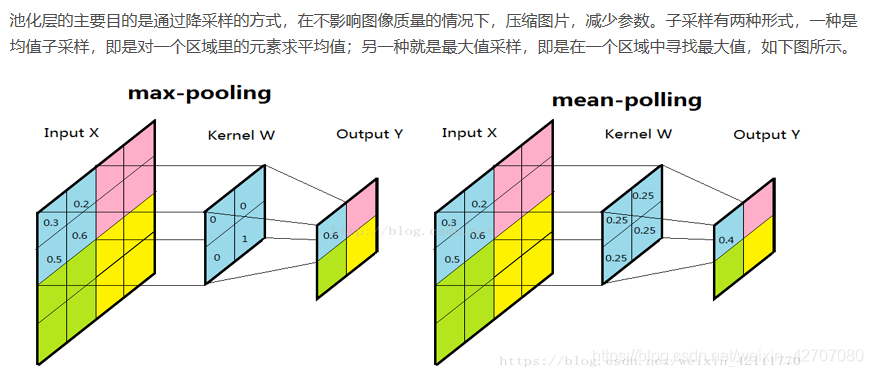

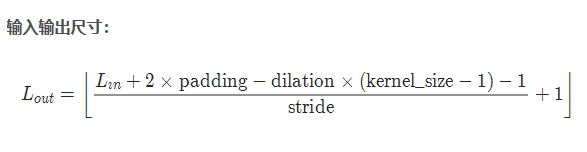

    kernel_size(int or tuple) - max pooling的窗口大小
    stride(int or tuple, optional) - max pooling的窗口移动的步长。默认值是kernel_size
    padding(int or tuple, optional) - 输入的每一条边补充0的层数
    dilation(int or tuple, optional) – 一个控制窗口中元素步幅的参数
    return_indices - 如果等于True，会返回输出最大值的序号，对于上采样操作会有帮助
    ceil_mode - 如果等于True，计算输出信号大小的时候，会使用向上取整，代替默认的向下取整的操作
    
- 如果padding不是0，会在输入的每一边添加相应数目0.

- 参数kernel_size，stride, padding，dilation数据类型： 可以是一个int类型的数据，此时卷积height和width值相同; 也可以是一个tuple数组（包含来两个int类型的数据），第一个int数据表示height的数值，tuple的第二个int类型的数据表示width的数值.

**nn.Linear()**

- torch.nn.Linear(in_features, out_features, bias=True)
    - 对输入数据做线性变换：y=Ax+b

参数：

- in_features - 每个输入样本的大小
- out_features - 每个输出样本的大小
- bias - 若设置为False，这层不会学习偏置。默认值：True

形状：

- 输入: (N,in_features)(N,in_features)
- 输出： (N,out_features)(N,out_features)

变量：

- weight -形状为(out_features x in_features)的模块中可学习的权值
- bias -形状为(out_features)的模块中可学习的偏置

**nn.BatchNorm1d()**

- torch.nn.BatchNorm1d(num_features, eps=1e-05, momentum=0.1, affine=True) 

对小批量(mini-batch)的2d或3d输入进行批标准化(Batch Normalization)操作
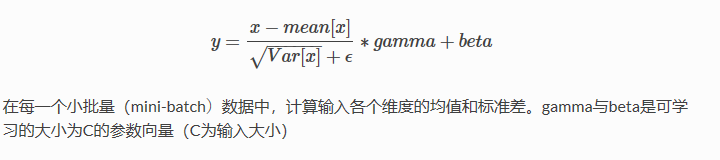

- 在训练时，该层计算每次输入的均值与方差，并进行移动平均。移动平均默认的动量值为0.1。

- 在验证时，训练求得的均值/方差将用于标准化验证数据。

**view**
- view: 原先tensor中的数据按照行优先的顺序排成一个一维的数据（这里应该是因为要求地址是连续存储的），然后按照参数组合成其他维度的tensor。比如说是不管你原先的数据是[[[1,2,3],[4,5,6]]]还是[1,2,3,4,5,6]，因为它们排成一维向量都是6个元素，所以只要view后面的参数一致，得到的结果都是一样的。

**forward()**
- 前向传播是在构建模型的类中进行定义，用forward()函数。

In [3]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        #convolutional layer
        self.conv1 = nn.Sequential(  #input_size=(1*28*28)
                                    nn.Conv2d(1, 6, 5, 1, 2), #padding=2保证输出尺寸相同
                                    nn.ReLU(), #input_size=6*28*28
                                    nn.MaxPool2d(kernel_size = 2, stride = 2) #output_size=6*14*14
                                  ) 
        self.conv2 = nn.Sequential(  #input_size=(6*14*14)
                                    nn.Conv2d(6, 16, 5), 
                                    nn.ReLU(), #input_size=16*10*10
                                    nn.MaxPool2d(2, 2) #output_size=16*5*5
                                  )
        #full_connected layer
        self.fc1 = nn.Sequential( #input_size=(16*5*5)
                                  nn.Linear(16*5*5, 120),
                                  nn.ReLU()
                                )
        self.fc2 = nn.Sequential( #input_size=(16*5*5)
                                  nn.Linear(120, 84),
                                  nn.ReLU()
                                )
        self.fc3 = nn.Linear(84, 10)
        
    #forward propagation
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        #nn.Linear() 的输入输出都是一维向量，需要把多维度的tensor转化成一维
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x  #F.softmax(x, dim=1)

# backward()


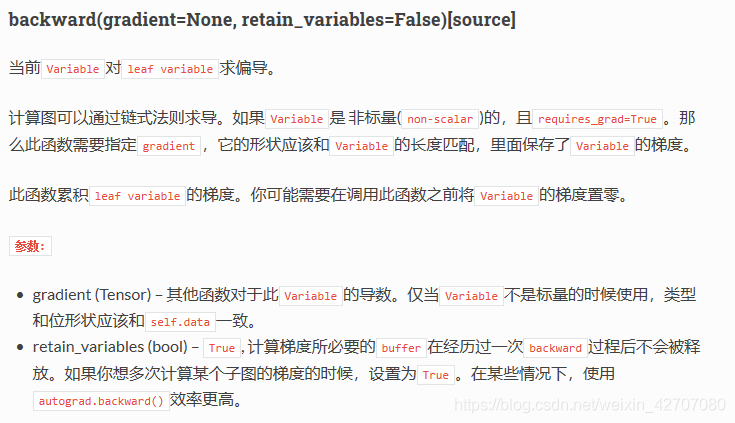

# Variable
- images, labels = Variable(images.cpu()), Variable(labels.cpu())

这里用variable的主要原因是variable可以用来自动求导。

用GPU跑的话改成下面这句：

- Variable(x_train.cuda()),Variable(y_train.cuda())

In [4]:
def train(epoch):   #定义每个epoch的训练步骤
    model.train()   #设置为training模式
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        data, target = Variable(data), Variable(target)   #把数据转换为variable,计算梯度
        optimizer.zero_grad()  #优化器梯度初始化为0
        output = model(data)   #把数据输入到网络并得到输出，即进行前向传播
        loss = F.cross_entropy(output, target) #交叉熵损失函数
        loss.backward()  #梯度反向传播
        optimizer.step() #结束一次前向+反向后更新参数
        if batch_idx % log_interval == 0:  #准备打印相关信息
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                  epoch, batch_idx * len(data), len(train_loader.dataset),
                  100. * batch_idx / len(train_loader), loss.item()))
        

model.eval()：
- 不启用 BatchNormalization 和 Dropout

In [5]:
def test():
    model.eval()   # 设置为test模式
    test_loss = 0  # 初始化测试损失值为0
    correct = 0    # 初始化预测正确的数据个数为0
    for data, target in test_loader:
 
        data = data.to(device)
        target = target.to(device)
        data, target = Variable(data), Variable(target)  #计算前要把变量变成Variable形式，因为这样子才有梯度
 
        output = model(data)
        test_loss += F.cross_entropy(output, target, size_average=False).item()  # sum up batch loss 把所有loss值进行累加
        pred = output.data.max(1, keepdim=True)[1]  # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()  # 对预测正确的数据个数进行累加
 
    test_loss /= len(test_loader.dataset)  # 因为把所有loss值进行过累加，所以最后要除以总得数据长度才得平均loss
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


# 原始数据处理 
把原始数据处理为模型使用的数据需要3步：transforms.Compose()，torchvision.datasets()， torch.utils.data.DataLoader()分别可以理解为数据处理格式的定义、数据处理和数据加载。

**transform.Compose()**
    
    - tansforms.Compose()意思就是将多种变换组合起来。
    - transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))将需要被处理的数据转为Tensor类型,实现数据的正则化。
    

**torchvision.datasets()**
- 这是pytorch自带的数据集，可以通过它来下载pytorch已有的数据集：
    - MNIST
    - COCO（用于图像标注和目标检测）(Captioning and Detection)
    - LSUN Classification
    - ImageFolder
    - Imagenet-12
    - CIFAR10 and CIFAR100
    - STL10
    

- rain_data = torchvision.datasets.MNIST(root='../../data',
                           train=True,
                           transform=transform,
                           download=True)
    - root : 存放文件 的目录   
    - train : True = 训练集, False = 测试集  
    - download : True = 从互联网上下载数据集，并把数据集放在root目录下. 如果数据集之前下载过，将处理过的数据（minist.py中有相关函数）放在root的目录下则会自动调用已经下载好的数据集。

- torchvision.datasets()包含了下面3个函数

    - __init__魔法方法里面进行读取数据文件
    - __getitem__魔法方法进行支持下标访问
    - __len__魔法方法返回自定义数据集的大小，方便后期遍历

- __init__(self, root, train=Ture, transform=None, traget_transform=None, download=False):该方法用来初始化类和对数据进行加载（有时需要定义一些开关来防止重复处理）。数据的加载就是针对不同的数据，把其data和label（分为训练数据和测试数据）读入到内存中。

- __getitem__(self, index):该方法是把读入的输出传给PyTorch（迭代器的方式）。


**torch.utils.data.DataLoader()**
    
创建训练数据迭代器
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                              batch_size=Config.batch_size,
                              shuffle=True)
                              
- dataloader是加载dataset,并设置其batch_size（单次训练时送入的样本数目），以及shuffle(是否打乱样本顺序，训练集一定要设置shuffle为True，测试集则无强制性规定)

- torch.utils.data.DataLoader() Data loder, Combines a dataset and and a sampler, and provides single, or multi-process iterators over the dataset. 就是把合成数据并且提供迭代访问。输入参数有：

    - dataset (Dataset) – 加载数据的数据集。
    - batch_size (int, optional) – 每个batch加载多少个样本(默认: 1)。
    - shuffle (bool, optional) – 设置为True时会在每个epoch重新打乱数据(默认: False).
    - sampler (Sampler, optional) – 定义从数据集中提取样本的策略。如果指定，则忽略shuffle参数。
    - num_workers (int, optional) – 用多少个子进程加载数据。0表示数据将在主进程中加载(默认: 0)
    - collate_fn (callable, optional) –整理数据，把每个batch数据整理为tensor。（一般使用默认调用default_collate(batch)）。
    - pin_memory (bool, optional) –针对不同类型的batch进行处理。比如为Map或者Squence等类型，需要处理为tensor类型。
    - drop_last (bool, optional) – 用于处理最后一个batch的数据。因为最后一个可能不能够被整除，如果设置为True，则舍弃最后一个，为False则保留最后一个，但是最后一个可能很小。(默认: False)
    

- torch.utils.data.DataLoader类主要使用torch.utils.data.sampler实现，sampler是所有采样器的基础类，提供了迭代器的迭代（__iter__）和长度（__len__）接口实现，同时sampler也是通过索引对数据进行洗牌(shuffle)等操作。因此，如果DataLoader不适用于你的数据，需要重新设计数据的分批次，可以充分使用所提供的smapler。



In [6]:
if __name__ == '__main__':
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #启用gpu
    
    train_loader = torch.utils.data.DataLoader( #加载训练集
        datasets.MNIST('./data/mnist', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))  #数据集给出的均值和标准差系数
                       ])),
        batch_size=batch_size, shuffle=True)
    
    test_loader = torch.utils.data.DataLoader(  # 加载训练数据，详细用法参考我的Pytorch打怪路（一）系列-（1）
        datasets.MNIST('./data/mnist', train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)) #数据集给出的均值和标准差系数，每个数据集都不同的，都数据集提供方给出的
        ])),
        batch_size=test_batch_size, shuffle=True)
    
    model = LeNet5()   #实例化对象
    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum) #初始化优化器
    
    for epoch in range(1, epochs+1):
        train(epoch)
        test()
        
    torch.save(model, 'model.pth')

100.1%

Extracting ./data/mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./data/mnist\MNIST\raw


113.5%

Extracting ./data/mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./data/mnist\MNIST\raw


100.4%

Extracting ./data/mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/mnist\MNIST\raw


180.4%D:\annaconda\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./data/mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/mnist\MNIST\raw
Processing...
Done!
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302768
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.289056
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.293817
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.293814
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.284492
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.280929
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.290743
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.277839
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.274877
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.284822
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.273928
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.260919
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.270397
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.235921
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.226813
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.197590
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.193518
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.185604
Train Epoch: 1 [11520/6

D:\annaconda\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1408, Accuracy: 9571/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.068342
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.164676
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.092187
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.140946
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.159138
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.218601
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.150477
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.198233
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.101644
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.180071
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.200735
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.154318
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.121542
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.031128
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.116735
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.294201
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.307648
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.067748
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.129395
Train Epoch: 2 [12

Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.065159
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.007153
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.068102
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.073307
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.099105
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.024047
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.017188
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.002069
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.022549
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.143450
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.026539
Train Epoch: 3 [52480/60000 (87%)]	Loss: 0.019465
Train Epoch: 3 [53120/60000 (88%)]	Loss: 0.081159
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.138310
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.076606
Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.065202
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.050232
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.141486
Train Epoch: 3 [56960/60000 (95%)]	Loss: 0.065583
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.152195


Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.016269
Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.040064
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.092793
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.193243
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.034134
Train Epoch: 5 [33280/60000 (55%)]	Loss: 0.021659
Train Epoch: 5 [33920/60000 (57%)]	Loss: 0.049620
Train Epoch: 5 [34560/60000 (58%)]	Loss: 0.016828
Train Epoch: 5 [35200/60000 (59%)]	Loss: 0.131477
Train Epoch: 5 [35840/60000 (60%)]	Loss: 0.010250
Train Epoch: 5 [36480/60000 (61%)]	Loss: 0.231977
Train Epoch: 5 [37120/60000 (62%)]	Loss: 0.047482
Train Epoch: 5 [37760/60000 (63%)]	Loss: 0.011568
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.068580
Train Epoch: 5 [39040/60000 (65%)]	Loss: 0.178691
Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.038735
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.013495
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.045719
Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.028477
Train Epoch: 5 [42240/60000 (70%)]	Loss: 0.102316


Train Epoch: 7 [14080/60000 (23%)]	Loss: 0.003717
Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.026573
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.047412
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.209491
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.029312
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.061279
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.031719
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.030240
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.080188
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.009374
Train Epoch: 7 [20480/60000 (34%)]	Loss: 0.036325
Train Epoch: 7 [21120/60000 (35%)]	Loss: 0.078596
Train Epoch: 7 [21760/60000 (36%)]	Loss: 0.040553
Train Epoch: 7 [22400/60000 (37%)]	Loss: 0.007384
Train Epoch: 7 [23040/60000 (38%)]	Loss: 0.031825
Train Epoch: 7 [23680/60000 (39%)]	Loss: 0.068296
Train Epoch: 7 [24320/60000 (41%)]	Loss: 0.048054
Train Epoch: 7 [24960/60000 (42%)]	Loss: 0.063238
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.012587
Train Epoch: 7 [26240/60000 (44%)]	Loss: 0.041617


Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.011014

Test set: Average loss: 0.0442, Accuracy: 9851/10000 (99%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.069614
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.016725
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.008014
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.082661
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.010579
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.052255
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.005669
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.069840
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.060534
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.011031
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.021437
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.032217
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.039007
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.010808
Train Epoch: 9 [8960/60000 (15%)]	Loss: 0.093255
Train Epoch: 9 [9600/60000 (16%)]	Loss: 0.066978
Train Epoch: 9 [10240/60000 (17%)]	Loss: 0.019008
Train Epoch: 9 [10880/60000 (18%)]	Loss: 0.047601
Train Epoch: 9 [11

Train Epoch: 10 [43520/60000 (72%)]	Loss: 0.050696
Train Epoch: 10 [44160/60000 (74%)]	Loss: 0.020303
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.059975
Train Epoch: 10 [45440/60000 (76%)]	Loss: 0.025531
Train Epoch: 10 [46080/60000 (77%)]	Loss: 0.049687
Train Epoch: 10 [46720/60000 (78%)]	Loss: 0.037781
Train Epoch: 10 [47360/60000 (79%)]	Loss: 0.031400
Train Epoch: 10 [48000/60000 (80%)]	Loss: 0.014497
Train Epoch: 10 [48640/60000 (81%)]	Loss: 0.016821
Train Epoch: 10 [49280/60000 (82%)]	Loss: 0.038742
Train Epoch: 10 [49920/60000 (83%)]	Loss: 0.016313
Train Epoch: 10 [50560/60000 (84%)]	Loss: 0.012685
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.008897
Train Epoch: 10 [51840/60000 (86%)]	Loss: 0.071827
Train Epoch: 10 [52480/60000 (87%)]	Loss: 0.019660
Train Epoch: 10 [53120/60000 (88%)]	Loss: 0.097358
Train Epoch: 10 [53760/60000 (90%)]	Loss: 0.007606
Train Epoch: 10 [54400/60000 (91%)]	Loss: 0.003392
Train Epoch: 10 [55040/60000 (92%)]	Loss: 0.031477
Train Epoch: 10 [55680/60000 (9